In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer


plt.style.use('ggplot')


In [3]:
data = pd.read_csv("C:/Datasets/Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
data.shape

(568454, 10)

EDA

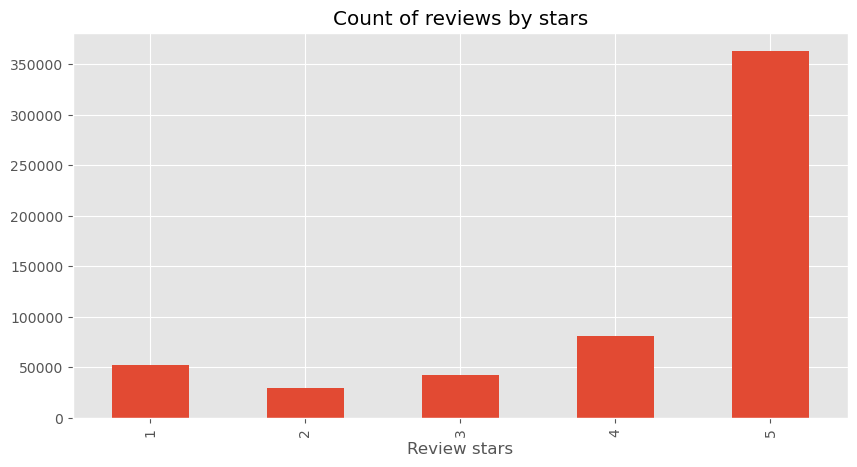

In [8]:
ax = data['Score'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by stars', figsize=(10,5))
ax.set_xlabel('Review stars')
plt.show()

Some NLTK

In [9]:
example = data['Text'][14]
print(example)

The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.


In [10]:
tok1 = nltk.word_tokenize(example)
print(tok1)

['The', 'Strawberry', 'Twizzlers', 'are', 'my', 'guilty', 'pleasure', '-', 'yummy', '.', 'Six', 'pounds', 'will', 'be', 'around', 'for', 'a', 'while', 'with', 'my', 'son', 'and', 'I', '.']


In [11]:
tok2 = nltk.sent_tokenize(example)
print(tok2)

['The Strawberry Twizzlers are my guilty pleasure - yummy.', 'Six pounds will be around for a while with my son and I.']


In [12]:
nltk.pos_tag(tok1)

[('The', 'DT'),
 ('Strawberry', 'NNP'),
 ('Twizzlers', 'NNPS'),
 ('are', 'VBP'),
 ('my', 'PRP$'),
 ('guilty', 'JJ'),
 ('pleasure', 'NN'),
 ('-', ':'),
 ('yummy', 'NN'),
 ('.', '.'),
 ('Six', 'NNP'),
 ('pounds', 'NNS'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('around', 'RB'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('while', 'NN'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('son', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('.', '.')]

In [13]:
tok1_clean = []

stop_words = set(stopwords.words('English'))
for word in tok1:
    if word not in stop_words:
        tok1_clean.append(word)
print(tok1_clean)

['The', 'Strawberry', 'Twizzlers', 'guilty', 'pleasure', '-', 'yummy', '.', 'Six', 'pounds', 'around', 'son', 'I', '.']


Vader

In [14]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}

In [22]:
from tqdm.notebook import tqdm
res = {}
for i, row in tqdm(data.iterrows(), total= len(data)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
vd = pd.DataFrame(res).T
vd = vd.reset_index().rename(columns = {'index' : 'Id'})
vader2 = pd.merge(vd,data, how='left')
vader2.head(5)

  0%|          | 0/568454 [00:00<?, ?it/s]

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


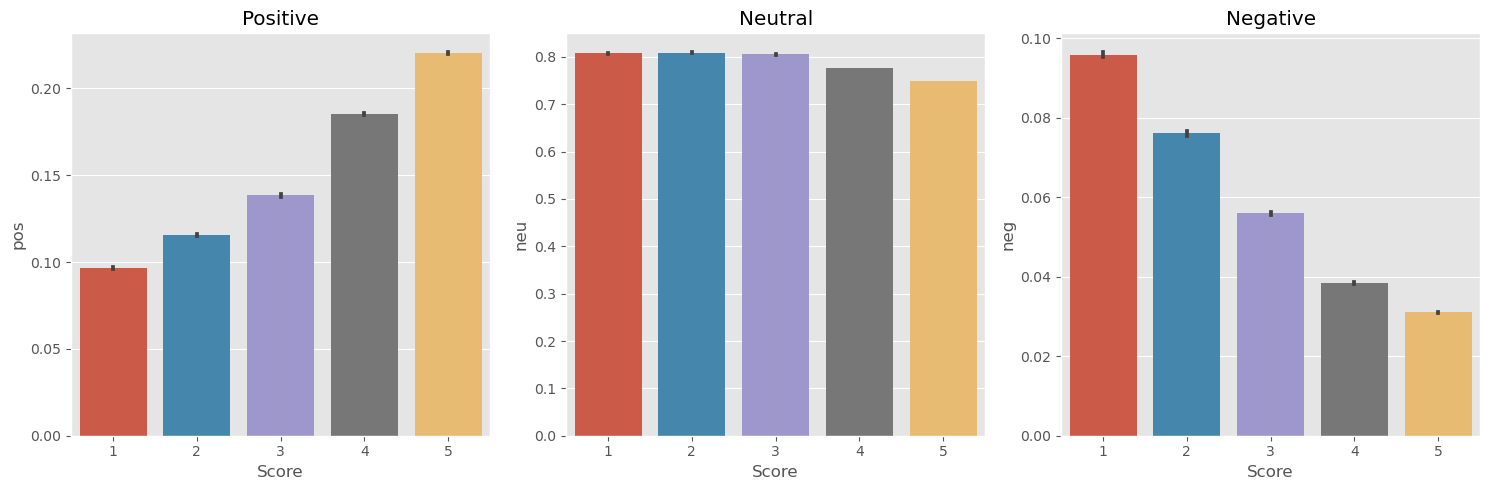

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))
sns.barplot(data = vader2, x = 'Score', y = 'pos', ax = ax[0])
sns.barplot(data = vader2, x = 'Score', y = 'neu', ax = ax[1])
sns.barplot(data = vader2, x = 'Score', y = 'neg', ax = ax[2])
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.tight_layout()
plt.show()

Roberta

In [4]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [5]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokinezer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

c:\Users\kwarg\anaconda3\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kwarg\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [15]:
print(example)
sia.polarity_scores(example)

The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.


{'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}

In [18]:
encoded_text = tokinezer(example, return_tensors = 'pt')
output = model(**encoded_text)
score = output[0][0].detach().numpy()
score = softmax(score)
score_dict = {
        'roberta_neg' : score[0],
        'roberta_neu' : score[1],
        'roberta_pos' : score[2]
    }
print(score_dict)

{'roberta_neg': 0.0018244234, 'roberta_neu': 0.021840978, 'roberta_pos': 0.9763346}


In [19]:
roberta = pd.DataFrame(columns = ['Id','roberta_neg','roberta_neu','roberta_pos'])

for i in range(3000):
    try:
        encoded_text = tokinezer(data.iloc[i][9], return_tensors = 'pt')
        output = model(**encoded_text)
        score = output[0][0].detach().numpy()
        score = softmax(score)
        score = score.tolist()
        roberta.loc[i] = [i,score[0],score[1],score[2]]
    except RuntimeError:
        pass
roberta

,Id,roberta_neg,roberta_neu,roberta_pos
0,0.0,0.009624,0.049980,0.940395
1,1.0,0.508986,0.452414,0.038600
2,2.0,0.003229,0.098067,0.898704
3,3.0,0.002295,0.090219,0.907486
4,4.0,0.001635,0.010302,0.988063
...,...,...,...,...
2995,2995.0,0.018536,0.143635,0.837829
2996,2996.0,0.009140,0.132567,0.858294
2997,2997.0,0.950696,0.042819,0.006484
2998,2998.0,0.006778,0.060676,0.932546


In [24]:
vader2.rename(columns = {'neg':'vader_neg','neu':'vader_neu','pos':'vader_pos','compound':'vader_compound'}, inplace = True)
vader2.head()
print("vader2 shape", vader2.shape)

vader2 shape (568454, 14)


In [26]:
df = pd.merge(roberta,vader2, on = 'Id')
df.head()


,Id,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,0.508986,0.452414,0.038600,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,0.003229,0.098067,0.898704,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,0.002295,0.090219,0.907486,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,0.001635,0.010302,0.988063,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,0.006130,0.021796,0.972075,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Comparaison between models

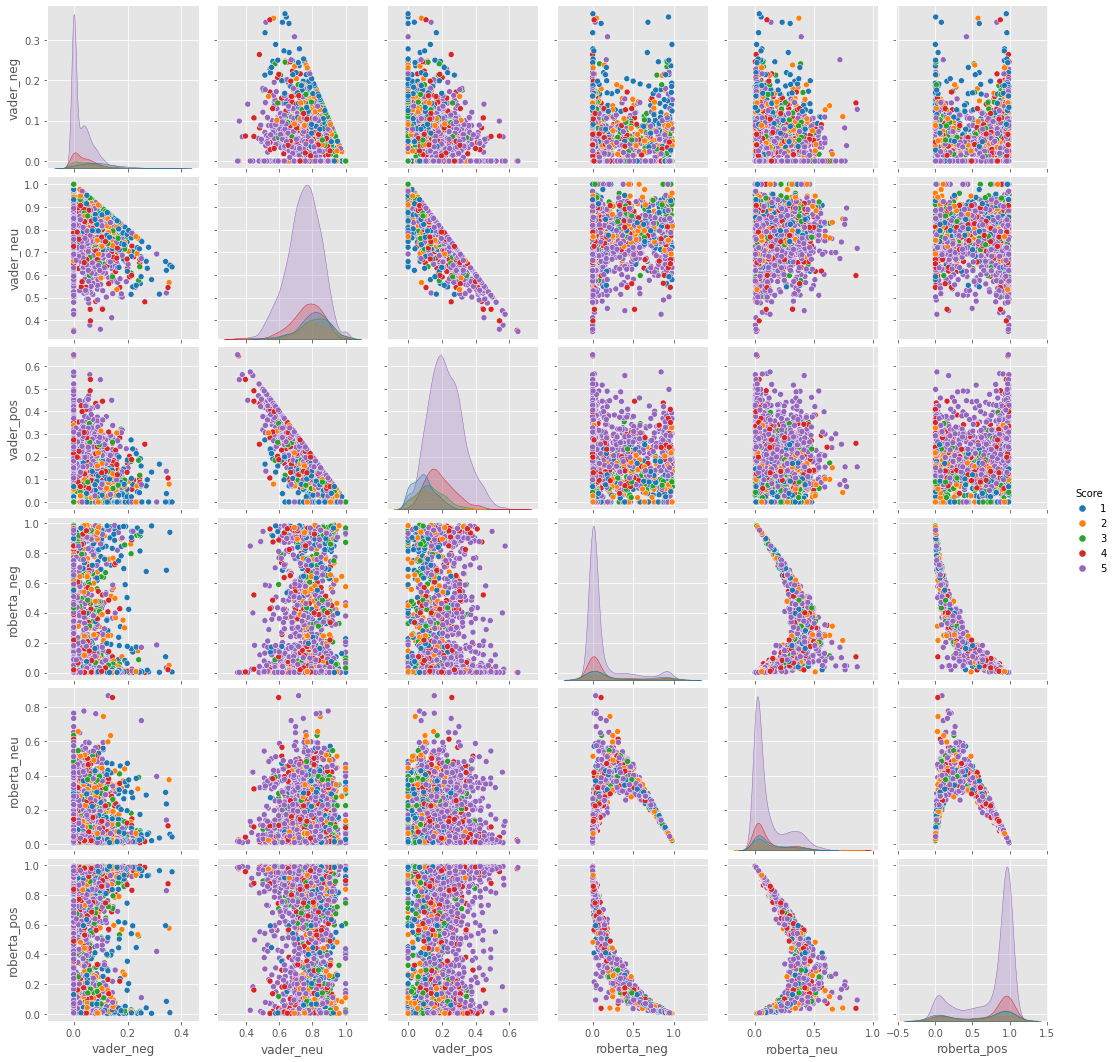

In [106]:
sns.pairplot(data = df, 
             vars = ['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],
             hue = 'Score', palette = 'tab10')
plt.show()

Review examples

In [107]:
df.query('Score == 1').sort_values('roberta_pos', ascending = False)['Text'].values[0]

"These singles sell for $2.50 - $3.36 at the store for 1 box of 24 singles. I'm not sure why Amazon is selling it for $9.99 for a box of 24 singles.  Hazelnut coffee creamer is my favorite, but truly this is not a good buy."

In [108]:
df.query('Score == 1').sort_values('vader_pos', ascending = False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [109]:
df.query('Score == 5').sort_values('roberta_neg', ascending = False)['Text'].values[0]

"this gum is super sick.tatooes are killin.flavor is a spankin'.this brings back bomb diggity memories yo.peace out."

In [110]:
df.query('Score == 5').sort_values('vader_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

Transformers pipeline

In [27]:
from transformers import pipeline

In [28]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [29]:
sentiment_pipeline("So we cancelled the order.  It was cancelled without any problem.  That is a positive note...")

[{'label': 'POSITIVE', 'score': 0.9988051652908325}]

In [114]:
sentiment_pipeline('this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault')

[{'label': 'NEGATIVE', 'score': 0.9980344176292419}]

In [120]:
print(data['Text'].values[45])
sentiment_pipeline(data['Text'].values[45])

This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.


[{'label': 'NEGATIVE', 'score': 0.9996598958969116}]